In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import basename, dirname
import torch
import seaborn as sns
from ipywidgets import FloatSlider, interactive

In [2]:
method_l = [
    "maxcorr", 
    "mincorr", 
    "maxlinreg", 
    "minlinreg", 
    "cca", 
    "lincka", 
    # "rbfcka",
]

In [3]:
# Set `res_d`, `network_l`, `num_neurons_d`
base = "/data/sls/temp/johnmwu/contextual-corr-analysis/results_test_"
res_fname = {method : base + method for method in 
                method_l}

res_d = {}
for method in method_l:
    with open(res_fname[method], 'rb') as f:
        res_d[method] = pickle.load(f)

network_l = [network for network in res_d["maxcorr"]["corrs"]]

num_neurons_d = {}
for network in network_l:
    num_neurons_d[network] = len(next(iter(res_d["maxcorr"]["corrs"][network].values()))) # god this is a hack

# MaxCorr, MinCorr, MaxLinReg, MinLinReg

### Sorts

In [4]:
rk_methods = {"maxcorr", "mincorr", "maxlinreg", "minlinreg"}

In [5]:
neuron_sorts = {network: {} for network in network_l}
for network in network_l:
    for method in rk_methods:
        neuron_sorts[network][method] = res_d[method]["neuron_sort"][network]

In [6]:
# Set `rk_ar_d`, `rk_df_d`, `spearman_d`
rk_ar_d = {}
rk_df_d = {}
spearman_d = {}
for network in network_l:
    # rk_ar[method_ix, neuron] = rank
    # need to invert the permutation
    rk_ar = np.stack([
            [neuron_sorts[network][method].index(neuron) for neuron in range(len(neuron_sorts[network][method]))]
                      for method in rk_methods
    ]).T
    rk_df = pd.DataFrame(rk_ar, columns=list(rk_methods))
    
    rk_ar_d[network] = rk_ar
    rk_df_d[network] = rk_df
    spearman_d[network] = rk_df.corr()

In [7]:
for network in network_l:
    print(network)
    # print(rk_df_d[network])
    print(spearman_d[network])

elmo_original_0
           maxlinreg  minlinreg   maxcorr   mincorr
maxlinreg   1.000000   0.968794  0.722622  0.718241
minlinreg   0.968794   1.000000  0.771616  0.770745
maxcorr     0.722622   0.771616  1.000000  0.925646
mincorr     0.718241   0.770745  0.925646  1.000000
elmo_original_1
           maxlinreg  minlinreg   maxcorr   mincorr
maxlinreg   1.000000   0.842158  0.668498  0.639297
minlinreg   0.842158   1.000000  0.482300  0.775074
maxcorr     0.668498   0.482300  1.000000  0.286156
mincorr     0.639297   0.775074  0.286156  1.000000
elmo_original_2
           maxlinreg  minlinreg   maxcorr   mincorr
maxlinreg   1.000000   0.830274  0.745920  0.640194
minlinreg   0.830274   1.000000  0.626508  0.802370
maxcorr     0.745920   0.626508  1.000000  0.467828
mincorr     0.640194   0.802370  0.467828  1.000000


### Distributions

In [9]:
method = "maxcorr"
network = "elmo_original_0"

In [11]:
notated_neuron = res_d[method]["neuron_notated_sort"][network][0]

In [16]:
res_d[method]["corrs"][network]

{'elmo_original_1': array([0.2644712 , 0.24154745, 0.3417127 , ..., 0.14911196, 0.3287669 ,
        0.1628318 ], dtype=float32),
 'elmo_original_2': array([0.2790686 , 0.17504421, 0.2784313 , ..., 0.14538047, 0.22215934,
        0.15905769], dtype=float32)}

In [12]:
notated_neuron

(184,
 {'elmo_original_1': (0.5912934, 814), 'elmo_original_2': (0.34182715, 839)})

In [15]:
np.hstack?

In [18]:
for network in network_l:
    print("\n\n" + network + ":")
    for method in rk_methods:
        print("\n" + method)
        if method == "maxlinreg" or method == "minlinreg": 
            corr_df = pd.DataFrame(res_d[method]['pred_power'][network])
        else:
            corr_df = pd.DataFrame(res_d[method]['corrs'][network])
        
        print("\nmaxcounts")
        print(corr_df.idxmax(axis=1).value_counts())
        
        print("\nmincounts")
        print(corr_df.idxmin(axis=1).value_counts())
        
        print("\ncorr_df_pctl")
        corr_df_pctl = pd.DataFrame()
        corr_df_pctl["max"] = corr_df.max(axis=1)
        corr_df_pctl["min"] = corr_df.min(axis=1)
        corr_df_pctl["med"] = corr_df.median(axis=1)
        print(corr_df_pctl.rank().corr()) # spearman
        
#         corr_df.plot()
#         plt.xlabel("neuron (sorted order)")
#         plt.ylabel("correlation")
#         plt.show()
        
#         plt.hist(corr_ar.ravel(), bins=100)
#         plt.xlabel("correlation")
#         plt.ylabel("count")
#         plt.show()



elmo_original_0:

maxlinreg

maxcounts
elmo_original_1    1024
dtype: int64

mincounts
elmo_original_2    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.968794  0.989115
min  0.968794  1.000000  0.994329
med  0.989115  0.994329  1.000000

minlinreg

maxcounts
elmo_original_1    1024
dtype: int64

mincounts
elmo_original_2    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.968794  0.989115
min  0.968794  1.000000  0.994329
med  0.989115  0.994329  1.000000

maxcorr

maxcounts
elmo_original_1    712
elmo_original_2    312
dtype: int64

mincounts
elmo_original_2    712
elmo_original_1    312
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.925646  0.985811
min  0.925646  1.000000  0.974360
med  0.985811  0.974360  1.000000

mincorr

maxcounts
elmo_original_1    712
elmo_original_2    312
dtype: int64

mincounts
elmo_original_2    712
elmo_original_1    312
dtype: int64

corr_df_pctl
     

# LinCKA

In [19]:
lincka_df = pd.DataFrame(res_d['lincka']['similarities'])

In [21]:
network = "elmo_original_0"
lincka_df.sort_values(by=network)[network]

elmo_original_2    0.500197
elmo_original_1    0.688917
elmo_original_0         NaN
Name: elmo_original_0, dtype: float64

# RBFCKA

In [ ]:
rbfcka_d = torch.load(res_fname["rbfcka"])
rbfcka_df = pd.DataFrame(rbfcka_d)

In [ ]:
rbfcka_df

In [ ]:
network = "bert_large_cased_0"
rbfcka_df.sort_values(by=network)[network]

# CCA

In [22]:
corrs, sv_similarities, pw_similarities = res_d['cca']['corrs'], res_d['cca']['sv_similarities'], res_d['cca']['pw_similarities']

In [23]:
sv_sim_df = pd.DataFrame(sv_similarities)
pw_sim_df = pd.DataFrame(pw_similarities)
corrs_df = pd.DataFrame(corrs)
maxcorrs_df = corrs_df.applymap(lambda t: float('nan') if type(t) is float else t.max().item())

In [24]:
pw_sim_df

,elmo_original_0,elmo_original_1,elmo_original_2
elmo_original_1,0.614226,NaN,0.697670
elmo_original_2,0.490601,0.701596,NaN
elmo_original_0,NaN,0.598978,0.471365


### SVCCA

In [26]:
network = "elmo_original_0"
sv_sim_df.sort_values(by=network)[network]

elmo_original_2    0.404964
elmo_original_1    0.531194
elmo_original_0         NaN
Name: elmo_original_0, dtype: float64

### PWCCA

In [27]:
network = "elmo_original_0"
pw_sim_df.sort_values(by=network)[network]

elmo_original_2    0.490601
elmo_original_1    0.614226
elmo_original_0         NaN
Name: elmo_original_0, dtype: float64

### Heatmaps

In [28]:
plt.rcParams["figure.figsize"] = (20,15)

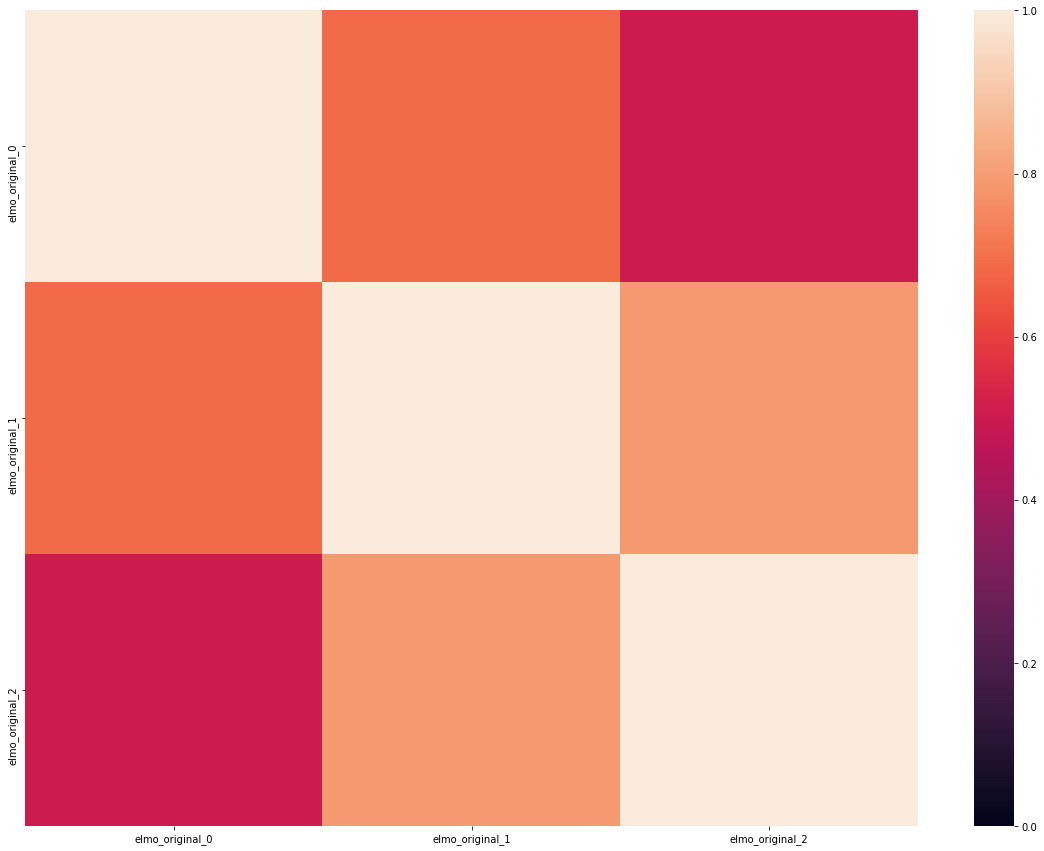

In [29]:
# lincka
sns.heatmap(lincka_df.reindex(lincka_df.columns).fillna(1), vmin=0, vmax=1)

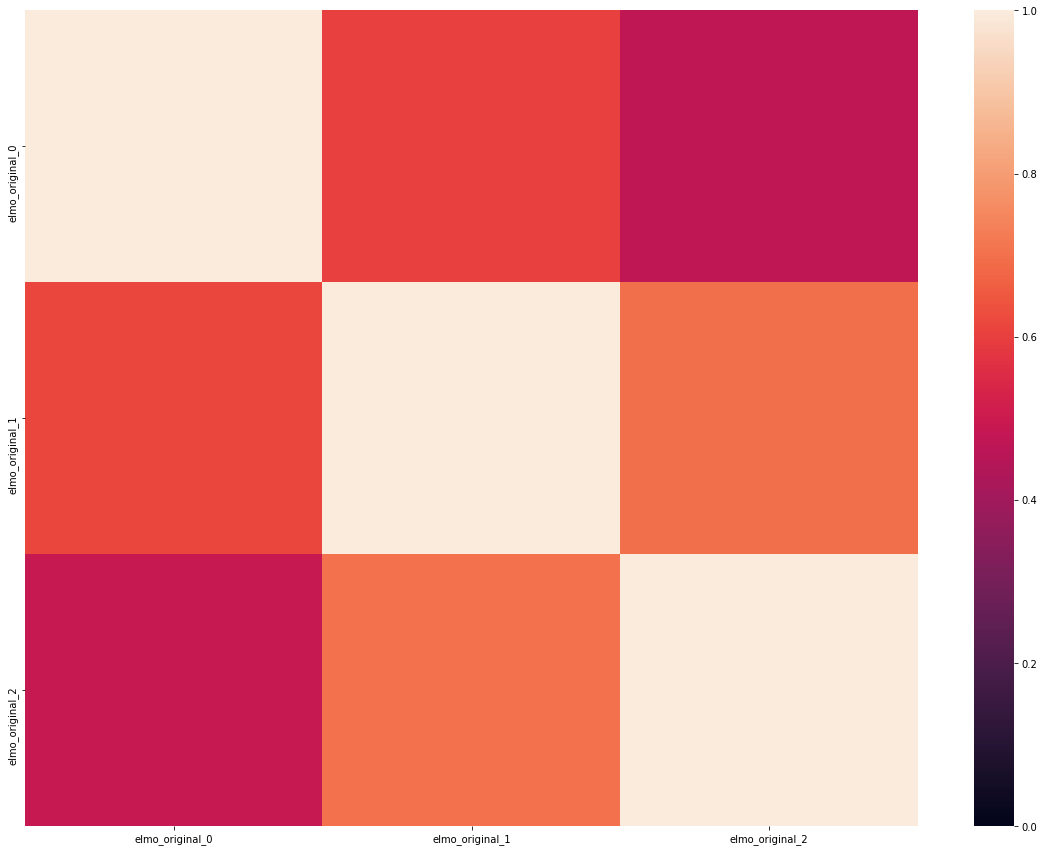

In [30]:
# pwcca
sns.heatmap(pw_sim_df.reindex(pw_sim_df.columns).fillna(1), vmin=0, vmax=1)

In [ ]:
plt.savefig?

In [31]:
memo = {}
fname = "temp_"
def sv_update(f):
    fname = "{0:.2f}.png".format(f)
    try:
        plt.imshow(fname+"{0:.2f}".format(f))
    except:
        pass
    
    try:
        df = memo[f]
    except:
        df = corrs_df.applymap(lambda t: float('nan') if type(t) is float else t[:int(f*len(t))].mean().item())
    sns.heatmap(df.fillna(1), vmin=0, vmax=1)
    # sns.heatmap(df.fillna(1), )
    plt.savefig(fname)
    plt.show()
slider = FloatSlider(min=0, max=1, step=0.1)

interactive(sv_update, f=slider)

interactive(children=(FloatSlider(value=0.0, description='f', max=1.0), Output()), _dom_classes=('widget-inter…

In [ ]:
# rbfcka
sns.heatmap(rbfcka_df.reindex(rbfcka_df.columns).fillna(1), vmin=0, vmax=1)

In [ ]:
# comparing models
# use lincka
model1 = "openai"
model2 = "xlnet"
cols = [s for s in lincka_df.columns if s.find(model1) >= 0]
rows = [s for s in lincka_df.columns if s.find(model2) >= 0]

In [ ]:
df = lincka_df.loc[rows, cols]

sns.heatmap(df, xticklabels=range(len(df.columns)), yticklabels=range(len(df.index)), annot=True)
plt.xlabel(model1)
plt.ylabel(model2)
plt.show()